In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
from os import chdir, system


In [3]:
data_folder = os.path.join(r"/notebooks/course-v3/nbs/dl1/data/privacy", "texts2.csv")
print(data_folder)

/notebooks/course-v3/nbs/dl1/data/privacy/texts2.csv


In [4]:
df = pd.read_csv(data_folder)
df.head()

,label,text,is_valid
0,positive,PRIVACY POLICY This privacy policy (hereafter...,False
1,positive,'AI Factory Privacy & Cookie Policy AI Factor...,False
2,negative,Automatic Call Recorder - Privacy Policy This...,False
3,positive,'MOBILE APPLICATION PRIVACY POLICY Effective ...,False
4,negative,Skip to content Features Explore Pricing This...,False


In [5]:
df['text'][3]

' \'MOBILE APPLICATION PRIVACY POLICY Effective Date: August 12th  2016 Last Updated: August 12th  2016 Welcome to BANDAI NAMCO Entertainment America Inc.! BANDAI NAMCO Entertainment America Inc. ("BANDAI NAMCO") respects the privacy rights of BANDAI NAMCO\'\'s users and recognize the importance of protecting all information that you may choose to share with us. To further this commitment  BANDAI NAMCO adopted this Mobile Application Privacy Policy ("Privacy Policy"). By using BANDAI NAMCO\'\'s mobile applications to which this Privacy Policy has been attached (collectively  "mobile application(s)")  you consent to our collection  storage  use  and disclosure of your personal information as described in this Privacy Policy. This privacy policy applies to the mobile applications listed here: PAC-MAN Pop! Fortress Legends Digimon Heroes! PAC-MAN Ms. PAC-MAN PAC-MAN Championship Edition PAC-MAN Championship Edition DX PAC-MAN Friends Brain Exercise More Brain Exercise Jewel Fight: Heroes 

In [6]:
path = r"/notebooks/course-v3/nbs/dl1/data/privacy"
data_lm = TextDataBunch.from_csv(path, 'texts2.csv')


In [7]:
data_lm.save()

In [8]:
data = load_data(path)

In [9]:
data = TextClasDataBunch.from_csv(path, 'texts2.csv')
data.show_batch()

text,target
xxbos xxmaj find xxunk xxunk / xxmaj post xxmaj job xxmaj upload your resume xxmaj sign in xxmaj what xxmaj where xxmaj advanced xxmaj job xxmaj search job title keywords or company city state or zip xxmaj cookies xxmaj privacy and xxmaj terms of xxmaj service xxmaj cookies xxmaj privacy and xxmaj terms of xxmaj service xxmaj cookie xxmaj policy xxmaj privacy xxmaj policy xxmaj indeed xxmaj terms of xxmaj,positive
xxbos xxmaj terms xxmaj of xxmaj use xxmaj flipkart xxmaj terms of xxmaj use xxmaj this document is an electronic record in terms of xxmaj information xxmaj technology xxmaj act 2000 and rules there under as applicable and the amended provisions pertaining to electronic records in various statutes as amended by the xxmaj information xxmaj technology xxmaj act 2000 . xxmaj this electronic record is generated by a computer system,positive
xxbos ' xxmaj privacy xxmaj statement xxmaj microsoft xxmaj privacy xxmaj statement xxmaj last xxmaj updated : xxmaj february 2017 xxmaj what ' 's new ? xxmaj expand xxunk xxmaj all xxmaj print xxmaj your privacy is important to us . xxmaj this privacy statement explains what personal data we collect from you and how we use it . xxmaj we encourage you to read the xxunk below and to,positive
"xxbos xxmaj meitu - xxmaj privacy xxmaj policy xxmaj your privacy is important to us . xxmaj meitu xxmaj inc. and its affiliate or controlled companies ( "" xxmaj meitu "" "" us "" "" our "" or "" we "" ) are dedicated to protecting the privacy rights of our users ( "" users "" or "" you "" ) . xxmaj this xxmaj privacy xxmaj policy ( the",positive
xxbos xxmaj in order to view this page correctly you must have a javascript - enabled browser and have javascript turned on . xxmaj we apologize for any inconvenience . xxmaj learn how to enable it . xxmaj business xxup new xxmaj shop now xxmaj account xxmaj menu xxmaj avast products xxmaj what would you like to protect ? xxup pc / xxmaj laptop xxmaj mac xxmaj android iphone /,positive


In [10]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

In [11]:
data.train_ds[0][0]

Text xxbos xxmaj open xxunk xxmaj menu xxmaj apple xxmaj shopping xxmaj bag xxmaj apple xxmaj mac ipad iphone xxmaj watch xxmaj music xxmaj support xxmaj search xxunk xxmaj shopping xxmaj bag xxmaj privacy xxmaj open xxmaj menu xxmaj close xxmaj menu xxmaj our xxmaj approach to xxmaj privacy xxmaj manage xxmaj your xxmaj privacy xxmaj government xxmaj information xxmaj requests xxmaj our xxmaj privacy xxmaj policy xxmaj privacy xxmaj policy xxmaj the xxmaj apple xxmaj privacy xxmaj policy was updated on xxmaj september 12 2016 . xxmaj your privacy is important to xxmaj apple . xxmaj so we 've developed a xxmaj privacy xxmaj policy that covers how we collect use disclose transfer and store your information . xxmaj please take a moment to familiarize yourself with our privacy practices and let us know if you have any questions . xxmaj your xxmaj california xxmaj privacy xxmaj disclosures xxmaj information xxmaj regarding xxmaj commercial xxmaj electronic xxmaj messages in xxmaj canada xx

In [12]:
data.train_ds[0][0].data[:10]

array([   2,    5,  716,    0,    5,  950,    5,  427,    5, 1423])

In [13]:
print(path)

/notebooks/course-v3/nbs/dl1/data/privacy


In [14]:
data = (TextList.from_csv(path, 'texts2.csv', cols='text').split_none()
                
                .label_from_df(cols=0)
                .databunch())
print(data)

TextClasDataBunch;

Train: LabelList (350 items)
x: TextList
xxbos xxup privacy xxup policy xxmaj this privacy policy ( hereafter referred to as the " xxmaj privacy xxmaj policy " ) is applicable to our websites apps and to all games and other xxunk referred to as the " our products " ) that are offered by us on or through our products . xxmaj tiny xxmaj piece having its registered office at xxmaj ajeltake xxmaj road xxmaj ajeltake xxmaj island xxmaj majuro xxmaj republic of the xxmaj marshall xxmaj island xxup mh 96960 ( hereafter referred to as " 6677 g " ) . 6677 g may use affiliates ' or reputable third parties ' services for the processing of personal data collected on or through our products . xxmaj by using or accessing our products you are accepting the practices described in this xxmaj privacy xxmaj policy . 1 . xxup about xxup our xxup products 1.1 xxmaj our products offer a xxunk current and exciting mix of games created by 6677 g as well as games created by independent deve

In [15]:
bs=48
print(path)

/notebooks/course-v3/nbs/dl1/data/privacy


In [16]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('d2.pkl')


In [17]:
data_lm = load_data(path, 'd2.pkl', bs=bs)

In [18]:
data_lm.show_batch()

idx,text
0,"by visiting accessing or using the http : / / xxunk website and domain name and any other linked pages features content or application services offered from time to time by xxmaj company in connection therewith or using any of our services or mobile applications ( collectively the "" xxmaj services "" ) you acknowledge that you accept the practices and policies outlined in this xxmaj privacy xxmaj policy ."
1,xxmaj information being transferred or used as described in this xxmaj policy please do not use the xxmaj application the xxmaj services or the xxmaj site and immediately delete all xxmaj applications from your xxmaj user xxmaj devices . xxup g. xxup sensitive xxup information xxmaj we ask that you not send us and you not disclose any sensitive xxmaj personal xxmaj information ( e.g. information related to racial or
2,"by such users through third party websites or sources ( ( i ) and ( ii ) collectively the "" xxmaj service "" ) . ' xxmaj acceptance and xxmaj consent : xxmaj by registering for a user account that enables you to post to the xxmaj forums ( the "" xxmaj account "" ) and / or using the xxmaj service you agree to the terms and conditions of"
3,track player activity and make games more awesome . xxmaj developer uses log files to store information such as internet protocol ( xxup ip ) addresses browser type internet service provider ( xxup isp ) referring exit and visited pages platform used date / time stamp track user 's movement in the whole and gather broad demographic information for aggregate use . xxup ip addresses etc are not linked to
4,or marketing offers to their customers on the xxmaj pandora xxmaj service . xxmaj marketing companies and data providers that create maintain and distribute professional marketing lists or segments or maintain and distribute other marketing or similar data . xxmaj governmental or xxunk or pseudo - governmental agencies or organizations that provide or make available to the public xxunk and demographic data . xxmaj governmental or xxunk or pseudo -


In [19]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [20]:
print("hey")

hey


In [21]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


In [22]:
learn.recorder.plot(skip_end=15)

In [23]:
learn.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

In [24]:
learn.save('fit_head')

In [25]:
learn.load('fit_head');

In [26]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(10, 1e-4, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.692282,3.555602,0.329911,02:20
1,3.494023,3.381531,0.354237,02:20
2,3.323601,3.241248,0.369549,02:20
3,3.200555,3.148980,0.380725,02:20
4,3.066830,3.081593,0.390069,02:19
5,2.994638,3.042197,0.394251,02:19
6,2.982804,3.018597,0.396875,02:19
7,2.897184,3.003196,0.398864,02:20
8,2.920551,2.997894,0.399577,02:20
9,2.890892,2.997223,0.399405,02:19


In [28]:
learn.save('fine_tuned')

In [29]:
learn.load('fine_tuned');

In [30]:
TEXT = "This app collects user"
N_WORDS = 40
N_SENTENCES = 2

In [31]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

This app collects user information for users and is used to analyze the content and content on the App . That information is collected in a variety of ways including but not limited to : username and email ) ; ' log
This app collects user information only for the purpose of controlling the device . This permission is provided by NQ Mobile 's third party service provider ( " NQ Mobile " ) and the NQ Mobile


In [32]:
learn.save_encoder('fine_tuned_enc')

In [33]:
bs = 12

In [34]:
path = r"/notebooks/course-v3/nbs/dl1/data/privacy"
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['neg', 'pos'])
             #label them all with their folders
             .databunch(bs=bs))

data_clas.save('data_classifier.pkl')

In [35]:
data_clas = load_data(path, 'data_classifier.pkl', bs=bs)

In [36]:
data_clas.show_batch()

text,target
xxbos xxmaj find xxunk xxunk / xxmaj post xxmaj job xxmaj upload your resume xxmaj sign in xxmaj what xxmaj where xxmaj advanced xxmaj job xxmaj search job title keywords or company city state or zip xxmaj cookies xxmaj privacy and xxmaj terms of xxmaj service xxmaj cookies xxmaj privacy and xxmaj terms of xxmaj service xxmaj cookie xxmaj policy xxmaj privacy xxmaj policy xxmaj indeed xxmaj terms of xxmaj,pos
xxbos xxmaj in order to view this page correctly you must have a javascript - enabled browser and have javascript turned on . xxmaj we apologize for any xxunk . xxmaj learn how to enable it . xxmaj business xxup new xxmaj shop now xxmaj account xxmaj menu xxmaj avast products xxmaj what would you like to protect ? xxup pc / xxmaj laptop xxmaj mac xxmaj android iphone /,pos
"xxbos xxup eula | xxmaj refund xxmaj policy xxup nq xxup mobile xxup privacy xxup policy xxup nq xxmaj mobile xxup us xxmaj inc. ( "" we "" "" us "" "" our "" ) is committed to maintaining customer privacy through an xxunk performance xxunk that is based on trust xxunk and confidence . xxmaj it is one of xxup nq xxmaj mobile 's core principles to secure customer",pos
xxbos xxmaj english xxmaj english xxmaj chinese xxmaj simplified xxmaj chinese xxmaj traditional xxmaj spanish xxmaj french ( xxmaj france ) xxmaj french ( xxmaj canada ) xxmaj german xxmaj russian xxmaj xxunk xxmaj japanese xxmaj korean xxmaj xxunk xxmaj dutch xxmaj swedish xxmaj turkish xxmaj danish xxmaj italian xxmaj polish xxmaj portuguese ( xxmaj portugal ) overview account center privacy and terms xxmaj overview xxmaj terms and xxmaj conditions,pos
xxbos xxmaj sign in xxmaj sign in with xxmaj google xxmaj oops ! xxmaj we could n't find a xxmaj dropbox account matching that email . xxmaj click here to create one . xxmaj email xxmaj password xxmaj xxunk lock is currently on xxmaj single sign - on enabled xxmaj remember me xxmaj sign in xxmaj continue or xxmaj log in with xxmaj dropbox credentials xxmaj we sent a code,neg


In [37]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (263 items)
x: TextList
xxbos ' xxmaj cheetah xxmaj mobile xxmaj clean xxmaj master xxup cm xxmaj security xxup piano xxup tiles 2 xxup live.me xxmaj more xxmaj products xxmaj clean xxmaj master xxup cm xxmaj security xxmaj live.me whatscall xxmaj piano xxmaj tiles 2 photogrid xxmaj news xxmaj republic xxmaj battery xxmaj doctor xxup cm xxmaj launcher xxup cm xxmaj browser xxup cm xxmaj locker xxup cm xxmaj backup xxup cm xxmaj behavior xxmaj cloud xxmaj clean xxmaj master for xxup pc xxmaj business xxmaj cheetah xxmaj ad xxmaj platform xxmaj pegasi xxmaj libra xxmaj media xxmaj blog xxmaj security xxmaj topics xxup ceo xxmaj talks xxmaj press xxmaj release xxmaj about xxmaj company xxmaj information xxmaj investor xxmaj relations xxmaj promotion xxmaj policy xxmaj global xxmaj talent xxmaj contact xxmaj us xxmaj follow xxmaj us xxmaj facebook xxmaj twitter linkedin xxmaj privacy xxmaj policy of xxmaj clean xxmaj master xxmaj last mo

In [38]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [39]:
!nvidia-smi

Tue Aug 25 05:09:23 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 450.36.06    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro M4000        On   | 00000000:00:05.0 Off |                  N/A |
| 59%   73C    P0    47W / 120W |   2735MiB /  8126MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

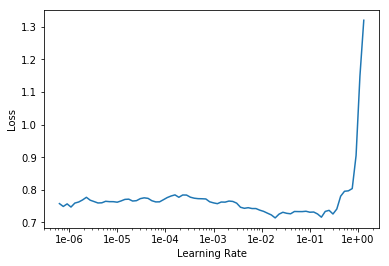

In [40]:
learn.recorder.plot()

In [41]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.706115,0.678118,0.637681,03:02


In [42]:
learn.save('first')

In [43]:
learn.load('first');

In [44]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.631238,0.719786,0.550725,03:02


In [45]:
learn.save('second')

In [46]:
learn.load('second');

In [47]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.497526,0.688643,0.652174,03:23


In [48]:
learn.save('third')

In [49]:
learn.load('third');

In [52]:
learn.unfreeze()
learn.fit_one_cycle(8, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.409473,0.703697,0.710145,03:05
1,0.392625,0.655659,0.753623,03:09
2,0.372075,0.747392,0.753623,03:05
3,0.349830,0.701857,0.724638,03:36
4,0.337428,0.710069,0.768116,03:33
5,0.314246,0.721630,0.739130,03:17
6,0.295174,0.715979,0.753623,03:20
7,0.271640,0.718630,0.768116,03:21


In [1]:
learn.predict("Play       Puzzles      Learn       Today      Connect      More         Sign Up       Log In          Search              Help         Ask a Question       Report Abuse       Make a Suggestion       Billing Issues       Report a Bug                          Privacy Policy  Effective date: December 19, 2019  Chess.com, LLC (us, we, or our) operates the chess.com website and the chess.com mobile application (the Service).  This page informs you of our policies regarding the collection, use, and disclosure of personal data when you use our Service and the choices you have associated with that data.  We use your data to provide and improve the Service. By using the Service, you agree to the collection and use of information in accordance with this policy. Unless otherwise defined in this Privacy Policy, terms used in this Privacy Policy have the same meanings as in our Terms and Conditions.     Definitions  Service  Service means the chess.com website and the chess.com mobile application operated by Chess.com, LLC     Personal Data  Personal Data means data about a living individual who can be identified from that data (or from that and other information either in our possession or likely to come into our possession).     Usage Data  Usage Data is data collected automatically either generated by the use of the Service or from the Service infrastructure itself (for example, the duration of a page visit).     Cookies  Cookies are small pieces of data stored on your device (computer or mobile device).  Data Controller  Data Controller means the natural or legal person who (either alone or jointly or in common with other persons) determines the purposes for which and the manner in which any personal information is, or is to be, processed. For the purpose of this Privacy Policy, we are a Data Controller of your Personal Data.  Data Processors (or Service Providers)  Data Processor means any natural or legal person, including Service Providers, who processes the data on behalf of the Data Controller. We may use the services of various Data Processors in order to process your data more effectively.  Data Subject (or User)  Data Subject is any living individual who is using our Service and is the subject of Personal Data.     Information Collection And Use  We collect several different types of information for various purposes to provide and improve our Service to you.     Types of Data Collected  Personal Data  While using our Service, we may ask you to provide us with certain personally identifiable information that can be used to contact or identify you (Personal Data). Personally identifiable information may include, but is not limited to:   Required Information (chess.com username and either an email address, Google public ID or Facebook public ID)  Optional Information (First name, last name, and other personal descriptors)  Cookies and Usage Data   We may use your Personal Data to contact you with newsletters, marketing or promotional materials and other information that may be of interest to you. You may opt out of receiving any, or all, of these communications from us by following the unsubscribe link or instructions provided in any email we send or by contacting us.  Usage Data  We may also collect information that your browser sends whenever you visit our Service or when you access the Service by or through a mobile device (Usage Data).  This Usage Data may include information such as your computer's Internet Protocol address (e.g. IP address), browser type, browser version, the pages of our Service that you visit, the time and date of your visit, the time spent on those pages, unique device identifiers and other diagnostic data.  When you access the Service by or through a mobile device, this Usage Data may include information such as the type of mobile device you use, your mobile device unique ID, the IP address of your mobile device, your mobile operating system, the type of mobile Internet browser you use, unique device identifiers and other diagnostic data.  Tracking Cookies Data  We use cookies and similar tracking technologies to track the activity on our Service and hold certain information.  Cookies are files with small amounts of data which may include an anonymous unique identifier. Cookies are sent to your browser from a website and stored on your device. Tracking technologies also used are beacons, tags, and scripts to collect and track information and to improve and analyze our Service.  You can instruct your browser to refuse all cookies or to indicate when a cookie is being sent. However, if you do not accept cookies, you may not be able to use some portions of our Service.  Examples of Cookies we use:   Session Cookies . We use Session Cookies to keep you logged into our Service.  Preference Cookies. We use Preference Cookies to remember your preferences and various settings.  Security Cookies. We use Security Cookies for security purposes.    Advertising Cookies. Advertising Cookies are used to serve you with advertisements that may be relevant to you and your interests. You may opt out of the use of these cookies by visiting the Google ad and content network privacy policy at http://www.privacychoice.org/companies or http://www.aboutads.info/choices . To learn more about this behavioral advertising practice or to opt-out of this type of advertising, you can visit www.networkadvertising.org .      Use of Data  Chess.com, LLC uses the collected data for various purposes:   To customize the advertising and content you see  To provide and maintain our Service  To notify you about changes to our Service  To allow you to participate in interactive features of our Service when you choose to do so  To provide customer support  To gather analysis or valuable information so that we can improve our Service  To monitor the usage of our Service  To detect, prevent and address technical issues  To provide you with news, special offers and general information about other goods, services and events which we offer that are similar to those that you have already purchased or enquired about unless you have opted not to receive such information  To conduct research, and provide aggregated, anonymized reporting about our general user community for internal and external clients.      Legal Basis for Processing Personal Data Under General Data Protection Regulation (GDPR)  If you are from the European Economic Area (EEA), Chess.com, LLC’s legal basis for collecting and using the personal information described in this Privacy Policy depends on the Personal Data we collect and the specific context in which we collect it.  Chess.com, LLC may process your Personal Data because:   We need to perform a contract with you  You have given us permission to do so  For payment processing purposes  To comply with the law      Retention of Data  Chess.com, LLC will retain your Personal Data only for as long as is necessary for the purposes set out in this Privacy Policy. We will retain and use your Personal Data to the extent necessary to comply with our legal obligations (for example, if we are required to retain your data to comply with applicable laws), resolve disputes, and enforce our legal agreements and policies.  Chess.com, LLC will also retain Usage Data for internal analysis purposes. Usage Data is generally retained for a shorter period of time, except when this data is used to strengthen the security or to improve the functionality of our Service, or we are legally obligated to retain this data for longer time periods.     Transfer Of Data  Your information, including Personal Data, may be transferred to — and maintained on — computers located outside of your state, province, country or other governmental jurisdiction where the data protection laws may differ than those from your jurisdiction.  If you are located outside United States and choose to provide information to us, please note that we transfer the data, including Personal Data, to the United States and process it there.  Your consent to this Privacy Policy followed by your submission of such information represents your agreement to that transfer.  Chess.com, LLC will take all steps reasonably necessary to ensure that your data is treated securely and in accordance with this Privacy Policy and no transfer of your Personal Data will take place to an organization or a country unless there are adequate controls in place including the security of your data and other personal information.     Disclosure Of Data  Business Transaction  If Chess.com, LLC is involved in a merger, acquisition or asset sale, your Personal Data may be transferred. We will provide notice before your Personal Data is transferred and becomes subject to a different Privacy Policy.  Disclosure for Law Enforcement  Under certain circumstances, Chess.com, LLC may be required to disclose your Personal Data if required to do so by law or in response to valid requests by public authorities (e.g. a court or a government agency).  Legal Requirements  Chess.com, LLC may disclose your Personal Data in the good faith belief that such action is necessary to:   To comply with a legal obligation  To protect and defend the rights or property of Chess.com, LLC  To prevent or investigate possible wrongdoing in connection with the Service  To protect the personal safety of users of the Service or the public  To protect against legal liability      Security Of Data  The security of your data is important to us, but remember that no method of transmission over the Internet, or method of electronic storage is 100% secure. While we strive to use commercially acceptable means to protect your Personal Data, we cannot guarantee its absolute security.     Do Not Track Signals  We do not support Do Not Track (DNT). Do Not Track is a preference you can set in your web browser to inform websites that you do not want to be tracked.  You can enable or disable Do Not Track by visiting the Preferences or Settings page of your web browser.     Your Data Protection Rights Under General Data Protection Regulation (GDPR)  If you are a resident of the European Economic Area (EEA), you have certain data protection rights. Chess.com, LLC aims to take reasonable steps to allow you to correct, amend, delete, or limit the use of your Personal Data.  If you wish to be informed what Personal Data we hold about you and if you want it to be removed from our systems, please contact us.  You can edit your Chess.com account information at any time. In certain circumstances, you have the following data protection rights:   The right to access, update or to delete the information we have on you. Whenever made possible, you can access, update or request deletion of your Personal Data directly within your account settings section. If you are unable to perform these actions yourself, please contact us to assist you.  The right of rectification. You have the right to have your information rectified if that information is inaccurate or incomplete.  The right to object. You have the right to object to our processing of your Personal Data.  The right of restriction. You have the right to request that we restrict the processing of your personal information.  The right to data portability. You have the right to be provided with a copy of the information we have on you in a structured, machine-readable and commonly used format.  The right to withdraw consent. You also have the right to withdraw your consent at any time where Chess.com, LLC relied on your consent to process your personal information.   Please note that we may ask you to verify your identity before responding to such requests.  You have the right to complain to a Data Protection Authority about our collection and use of your Personal Data. For more information, please contact your local data protection authority in the European Economic Area (EEA).     Service Providers  We may employ third party companies and individuals to facilitate our Service (Service Providers), including Data Processors, to provide the Service on our behalf, to perform Service-related services or to assist us in analyzing how our Service is used.  These third parties have access to your Personal Data only to perform these tasks on our behalf and are obligated not to disclose or use it for any other purpose.     Analytics  We may use third-party Service Providers to monitor and analyze the use of our Service.  Amplitude  Amplitude is a web analytics service that tracks and reports website traffic. It uses the data collected to track and monitor the use of our Service.     Advertising  We may use third-party Service Providers to show advertisements to you to help support and maintain our Service.  Google AdSense DoubleClick Cookie  Google, as a third party vendor, uses cookies to serve ads on our Service. Google's use of the DoubleClick cookie enables it and its partners to serve ads to our users based on their visit to our Service or other websites on the Internet.  You may opt out of the use of the DoubleClick Cookie for interest-based advertising by visiting the Google Ads Settings web page: http://www.google.com/ads/preferences .     Payments  We may provide paid products and/or services within the Service. In that case, we use third-party services for payment processing (e.g. payment processors).  We will not store or collect your payment card details. That information is provided directly to our third-party payment processors whose use of your personal information is governed by their Privacy Policy. These payment processors adhere to the standards set by PCI-DSS as managed by the PCI Security Standards Council, which is a joint effort of brands like Visa, Mastercard, American Express and Discover. PCI-DSS requirements help ensure the secure handling of payment information.  The payment processors we work with are:  Apple Store In-App Payments  Their Privacy Policy can be viewed at https://www.apple.com/legal/privacy/en-ww  Google Play In-App Payments  Their Privacy Policy can be viewed at https://www.google.com/policies/privacy  Adyen  Their Privacy Policy can be viewed at https://docs.adyen.com/legal/terms-conditions  PayPal  Their Privacy Policy can be viewed at https://www.paypal.com/webapps/mpp/ua/privacy-full     Links To Other Sites  Our Service may contain links to other sites that are not operated by us. If you click on a third party link, you will be directed to that third party's site. We strongly advise you to review the Privacy Policy of every site you visit.  We have no control over and assume no responsibility for the content, privacy policies or practices of any third party sites or services.     Children's Privacy  Chess.com does not target anyone under the age of 18 (Children) for use of our Service.  We do not knowingly collect personally identifiable information from anyone under the age of 18. If you are a parent or guardian and you are aware that your Children has provided us with Personal Data, please contact us. If we become aware that we have collected Personal Data from children without verification of parental consent, we take steps to remove that information from our servers.     PRIVACY NOTICE FOR CALIFORNIA RESIDENTS  This Privacy Notice for California Residents supplements the information contained in our Privacy Policy and applies solely to all visitors, users and others who reside in the State of California. We adopt this notice to comply with the California Consumer Privacy Act of 2018 (CCPA). Any terms defined in the CCPA have the same meaning when used in this notice.  Your Rights and Choices  The CCPA provides consumers (California residents) with specific rights regarding their personal information. For purposes of the Privacy Notice for California Residents , personal information includes  Personal Data ,  Usage Data , and  Cookies  as those terms are defined in this Privacy Policy. This section describes your CCPA rights and explains how to exercise those rights.  Access to Specific Information and Data Portability Rights  You have the right to request that we disclose certain information to you about our collection and use of your personal information over the past 12 months that is not otherwise subject to an exception under the CCPA.  Deletion Request Rights  You also have the right to request that we delete any of your personal information that we collected from you and retained, subject to certain exceptions.  Exercising Access, Data Portability, and Deletion Rights  To exercise the access, data portability, and deletion rights described above, please submit a verifiable consumer request to us by:    Phone: 1 (800) 318-2827 Ext. 121  Email:  support@chess.com  Postal Address: Chess.com, LLC 877 E 1200 S #970397 Orem, UT 94097   To be verifiable your request must:   Provide sufficient information that allows us to reasonably verify you are the person about whom we collected personal information or an authorized representative.  Describe your request with sufficient detail that allows us to properly understand, evaluate, and respond to it.   We cannot respond to your request or provide you with personal information if we cannot verify your identity or authority to make the request and confirm the personal information relates to you.  Only you, or a person registered with the California Secretary of State that you authorize to act on your behalf, may make a verifiable consumer request related to your personal information. You may also make a verifiable consumer request on behalf of your minor child.  Non-Discrimination  We will not discriminate against you for exercising any of your CCPA rights. Unless permitted by the CCPA, we will not: (i) deny you goods or services; (ii) charge you different prices or rates for goods or services, including through granting discounts or other benefits, or imposing penalties; (iii) provide you a different level or quality of goods or services; or (iv) suggest that you may receive a different price or rate for goods or services or a different level or quality of goods or services.  Selling Your Personal Information  We do not sell, and have not sold your personal information to third parties for a business or commercial purpose in the 12 months preceding the effective date of this Privacy Policy, as we understand the term “sell” to mean under the CCPA.  Personal Information we Collect, Use and Disclose  The CCPA specifies categories of personal information protected under the CCPA. The following chart provides information about the personal information we collect relative to each category and the sources from which we collect such data. For additional information regarding the personal information we collect and have collected in the 12 months preceding the effective date of our Privacy Policy see the heading  Types of Data Collected  of our Privacy Policy. We may use personal information for the business/commercial purposes described under the heading  Use of Data  of our Privacy Policy. For information about how we share your personal information see the headings  Disclosure of Data ,  Service Providers ,  Analytics  and  Advertising  of our Privacy Policy.      Personal Information Category  PI we collect in this Category  Sources of PI        Identifiers      A real name or alias  Internet Protocol address(es)  Email address  Account name (username), or other similar identifier  Mobile push tokens  Specific third-party identifiers relating to chess services (e.g., USCF or FIDE ID number) may be collected for some accounts      Information you provide us  Information we collect from you automatically  3rd Party Service Provider        Personal information categories listed in the California Customer Records statute (Cal. Civ. Code § 1798.80(e))      not applicable      not applicable        Protected classification characteristics under California or federal law      not applicable      not applicable        Commercial information      not applicable      not applicable       Biometric information      not applicable      not applicable       Internet or other similar network activity      Browsing history on chess.com only      Information we collect from you automatically  3rd Party Service Provider       Geolocation data      not applicable      not applicable       Sensory data      not applicable      not applicable       Professional or employment-related information      not applicable      not applicable       Non-public education information (per the Family Educational Rights and Privacy Act (20 U.S.C. Section 1232g, 34 C.F.R. Part 99))      not applicable      not applicable       Inferences drawn from other personal information      not applicable      not applicable       CONTACT INFORMATION If you have any questions or comments about this notice or the ways in which Chess.com, LLC collects and uses your information as described in the Privacy Policy or you wish to excercise your rights under California law, please do not hesitate to contact us at:   Phone: 1 (800) 318-2827 Ext. 121  Email:  support@chess.com  Postal Address: Chess.com, LLC 877 E 1200 S #970397 Orem, UT 94097     CHANGES TO THIS PRIVACY POLICY NOTICE We reserve the right to amend our Privacy Policy at our discretion and at any time. When we make changes to our Privacy Policy, we will (i) let you know via email and/or a prominent notice on our Services and (ii) post the updated Privacy Policy on the website and update the Privacy Policy's effective date. You are advised to review this Privacy Policy periodically for any changes. Your continued use of our website following the posting of changes constitutes your acceptance of such changes.     Policies     Terms of Service    Privacy Policy    Subscriber Agreement    Community Policies       Help  Why Join?  About  Jobs  Developers  User Agreement  Privacy Policy  Community Policies  Chess.com © 2020 ")

NameError: name 'learn' is not defined